In [1]:
# import libraries
import pandas as pd
import numpy as np

In [ ]:
### 3.  Anonymous Dataset from statefarm

In [90]:
#Load all the libraries required for the project
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [197]:
import matplotlib.pyplot as plt

In [2]:
# load messages dataset
df_train = pd.read_csv('exercise_02_train.csv')
df_test = pd.read_csv('exercise_02_test.csv')
#df_train.head(5)

### 1. Train Data Exploration and Cleansing

In [3]:
df_train.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-3.045511,-1.719337,asia,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319,0


In [5]:
df_train.shape

(40000, 101)

In [6]:
df_train.columns[df_train.isna().any().values]

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99'],
      dtype='object')

In [12]:
#df_train.isnull().sum()#Nunmber of null valuesin each column

In [8]:
df_train.columns[(df_train.isnull().sum() * 100) / (df_train.shape[0]) > 1]#Find out how many columns have NaNs up to 1%

Index([], dtype='object')

In [9]:
df = df_train[~df_train.isna().any(axis = 1)]#Remove all instances of nan in the dataframe

In [84]:
obj_types = df.select_dtypes(include = ['object']).copy()#Find out categorical datsets

In [85]:
obj_types.head(10)

,x34,x35,x68,x93
0,Toyota,wednesday,Jun,asia
1,Honda,wednesday,sept.,asia
2,bmw,wednesday,Oct,america
3,volkswagon,wednesday,Jun,asia
4,volkswagon,thursday,July,asia
5,Toyota,wednesday,Aug,asia
6,bmw,wednesday,Aug,asia
7,Honda,wednesday,Aug,asia
8,Toyota,wednesday,Apr,asia
9,Toyota,thursday,Jun,asia


In [182]:
obj_types['x34'].value_counts()

volkswagon    12199
Toyota        10867
bmw            7155
Honda          5060
tesla          2189
chrystler      1188
nissan          331
ford            156
mercades         26
chevrolet        11
Name: x34, dtype: int64

In [ ]:
#treat and engineer the categorical datasets

In [16]:
removeSign = lambda x: x[1:]#Remove first element of an element

In [26]:
df['x41'] = df['x41'].apply(removeSign).astype(float)#Changed to float type, and remove the sign

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
removeLast = lambda x: x[:-1]#Remove last memeber of an element

In [31]:
obj_types['x35'] = obj_types['x35'].apply(change_val)

-0.01%    9393
0.01%     9353
0.0%      7828
-0.0%     7405
0.02%     2337
-0.02%    2318
-0.03%     278
0.03%      243
-0.04%      17
0.04%       10
Name: x45, dtype: int64

In [40]:
#obj_types['x45'] = obj_types['x45'].apply(removeLast).astype(float)

In [42]:
df['x45'] = df['x45'].apply(removeLast).astype(float)

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#obj_types['x41'] = obj_types['x41'].apply(removLast).astype(float)

In [75]:
change_val = lambda x:'Dec' if x=='Dev' else x#Change the value of a given element, say Dev to December, thur to Thursday

In [63]:
obj_types['x35'] = obj_types['x35'].apply(change_val)

In [76]:
df['x68'] = df['x68'].apply(change_val)
#obj_types['x41'] = obj_types['x41'].apply(removLast).astype(float)

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
float_types = df.select_dtypes(include = ['float']).copy()#Get only the float d_tyes 

In [92]:
float_types.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,-1.960280,-155.442237,0.800948,1.553846,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,7.242614,-73.365593,2.031707,7.544422,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,1.740493,-23.433184,-0.992474,1.385799,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.724591,38.547680,-1.157845,6.036804,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-1.541274,-17.226981,-3.045511,-1.719337,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319


In [93]:
df.to_csv('NewTrainDF.csv', index = False)#Saved the new cleaned dataframe

In [ ]:
##Find the outliers in each

In [95]:
float_types.iloc[:,:25].head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,-7.340866,0.267735,1.081311,-15.236885,1.159306,-27.961682,11.829013,43.295583,-0.880307,-4.518688
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,0.042640,2.354558,-8.940383,19.741290,17.559436,9.841718,-12.457077,15.719526,8.212825,1.067061
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,1.261521,-1.797489,-0.614719,25.529246,22.418811,7.281959,51.966010,-10.832756,-0.945138,-0.246806
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-8.126781,2.058786,5.796101,53.029270,-16.178983,13.823307,30.155518,12.922670,6.564312,2.556431
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-5.610306,2.768667,-3.690564,1.107321,-13.783970,-4.636736,-10.493426,-21.019953,-3.156979,-1.597321


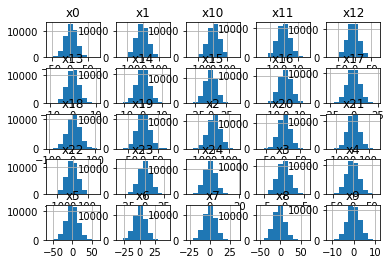

In [96]:
#Data Visualizations
#histograms
float_types.iloc[:,:25].hist()
pyplot.show()
# scatter plot matrix
#scatter_matrix(float_types)
#pyplot.show()
# First 25 Show paramtric distributions

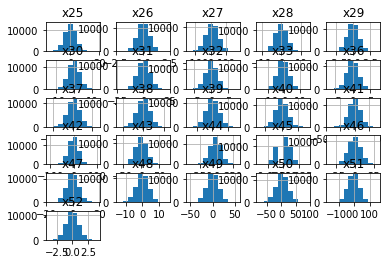

In [97]:
#Data Visualizations
#histograms
float_types.iloc[:,25:51].hist()
pyplot.show()
# scatter plot matrix
#scatter_matrix(float_types)
#pyplot.show()
#2nd 25 Show paramtric distributions

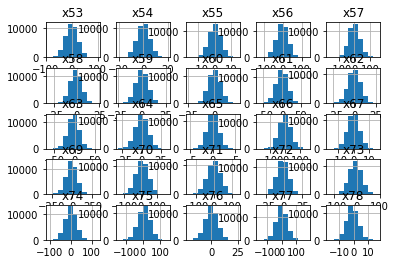

In [99]:
#Data Visualizations
#histograms
float_types.iloc[:,51:76].hist()
pyplot.show()
# scatter plot matrix
#scatter_matrix(float_types)
#pyplot.show()
#3rd 25 Show paramtric distributions

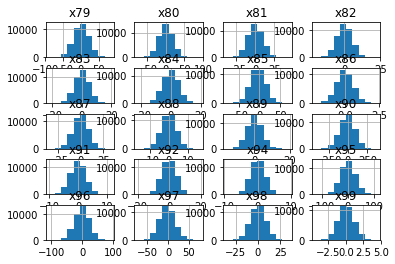

In [100]:
#Data Visualizations
#histograms
float_types.iloc[:,76:].hist()
pyplot.show()
# scatter plot matrix
#scatter_matrix(float_types)
#pyplot.show()
#final batch Show paramtric distributions

In [109]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix as scatter

In [102]:
#float_types.columns

Given that all columns show parametric distributions, I applied zscore in finding outliers

In [122]:
#float_types['x99']

In [106]:
float_types.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,zscore
count,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,...,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,39182.000000,3.918200e+04
mean,3.449241,-7.804870,1.713236,-0.073733,0.133611,-0.614352,0.040018,-0.053879,-2.913257,-0.022921,...,-9.117386,-0.001451,-0.004901,-0.014700,-0.106153,-0.836994,-2.538000,0.053037,0.043160,1.966451e-17
std,16.239205,37.011629,38.387685,1.504220,16.286201,15.586373,9.045815,6.948283,13.142383,2.939357,...,96.689524,2.628554,4.606942,2.164805,27.534484,23.832197,18.554920,8.450041,1.115332,1.000013e+00
min,-60.113902,-157.341119,-163.339956,-6.276969,-61.632319,-62.808995,-35.060656,-26.736717,-53.735586,-11.497395,...,-422.711982,-10.179216,-20.044113,-9.396153,-125.064735,-108.474714,-73.908741,-35.416133,-4.376614,-3.962792e+00
25%,-7.593210,-32.716512,-24.156128,-1.088384,-10.888105,-11.199135,-6.084171,-4.745854,-11.722776,-2.002027,...,-73.399497,-1.777953,-3.105805,-1.490699,-18.499927,-16.858572,-15.041889,-5.635960,-0.710921,-6.761129e-01
50%,3.458413,-8.026095,1.959583,-0.062894,0.138015,-0.575871,0.043832,-0.043912,-2.960221,-0.053051,...,-6.892592,-0.018473,-0.003659,-0.013689,0.058288,-0.680395,-2.526155,0.051164,0.041732,-1.280126e-03
75%,14.267872,16.793057,27.517244,0.940109,11.095779,9.962899,6.101419,4.635347,5.844992,1.959467,...,56.625317,1.761148,3.100599,1.446040,18.527298,15.248345,9.864689,5.746475,0.797410,6.762643e-01
max,75.311659,153.469221,154.051060,5.837559,65.949709,63.424046,45.053946,34.267792,66.936936,11.271939,...,378.752405,11.295740,19.414284,9.136848,112.390710,92.926545,76.120119,34.170189,4.490209,3.987247e+00


In [127]:
''''#Using Z-score
outlier = lambda x: x <= -3 or x >= 3
from scipy.stats import zscore
cols = list(float_types.columns)
float_types["zscore"] = zscore(float_types['x99'])
float_types['is_outlier'] = float_types['zscore'].apply(outlier)
float_types[float_types["is_outlier"]]'''

'\'#Using Z-score\noutlier = lambda x: x <= -3 or x >= 3\nfrom scipy.stats import zscore\ncols = list(float_types.columns)\nfloat_types["zscore"] = zscore(float_types[\'x99\'])\nfloat_types[\'is_outlier\'] = float_types[\'zscore\'].apply(outlier)\nfloat_types[float_types["is_outlier"]]'

In [118]:
#float_types.drop(['zscore','is_outlier'], axis = 1, inplace = True)
float_types.head(3).index

Int64Index([0, 1, 2], dtype='int64')

In [123]:
float_types = df.select_dtypes(include = ['float']).copy()#Get only the float d_tyes 

In [124]:
float_types.shape

(39182, 96)

In [125]:
#Using Z-score
outlier = lambda x: x <= -3 or x >= 3#Take out any data point greater from the 3rd standard dev
from scipy.stats import zscore
cols = list(float_types.columns)
for col in cols:
    float_types["zscore"] = zscore(float_types[col])
    float_types['is_outlier'] = float_types['zscore'].apply(outlier)
    out_ind = list(float_types[float_types["is_outlier"]].index)
    float_types.drop(out_ind, axis = 0, inplace = True)
    float_types.drop(['zscore','is_outlier'], axis = 1, inplace = True)

In [126]:
float_types.shape

(30131, 96)

In [130]:
#index of all cleaned 
indices = list(float_types.index)

In [132]:
#New cleaned dataframe
new_df = df[df.index.isin(indices)]

In [134]:
new_df.shape

(30131, 101)

In [210]:
new_df.to_csv('NewCleanDF.csv', index = False)#Saved the new cleaned dataframe

In [139]:
#Split into dependent and independent variables
X = new_df.iloc[:,:100].values
y = new_df.iloc[:,100].values

In [140]:
len(y)

30131

In [145]:
new_df.head(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1


In [146]:
obj_types1 = new_df.select_dtypes(include = ['object']).copy()

In [147]:
obj_types1.head()

,x34,x35,x68,x93
0,Toyota,wednesday,Jun,asia
1,Honda,wednesday,sept.,asia
2,bmw,wednesday,Oct,america
3,volkswagon,wednesday,Jun,asia
4,volkswagon,thursday,July,asia


In [162]:
obj_types1['x93'].value_counts()

asia       26672
america     2358
euorpe      1101
Name: x93, dtype: int64

### 2.  Feature Engineering

In [ ]:
#Indices of categorical variables: 34-x34, 35-x35,...

In [153]:
new_df.iloc[0,93]

'asia'

In [158]:
len(X)

30131

In [159]:
X[:,93]

array(['asia', 'asia', 'america', ..., 'asia', 'asia', 'asia'],
      dtype=object)

In [160]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 34] = labelencoder_X_1.fit_transform(X[:, 34])
labelencoder_X_2 = LabelEncoder()
X[:, 35] = labelencoder_X_2.fit_transform(X[:, 35])
labelencoder_X_3 = LabelEncoder()
X[:, 68] = labelencoder_X_3.fit_transform(X[:, 68])
labelencoder_X_4 = LabelEncoder()
X[:, 93] = labelencoder_X_4.fit_transform(X[:, 93])

In [164]:
set(X[:,93])#Check to see some results

{0, 1, 2}

In [171]:
onehotencoder = OneHotEncoder(categorical_features = [34,35,68,93])
Xn = onehotencoder.fit_transform(X).toarray()#X encoded a Xn

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [190]:
Xn = Xn[:,4:]#Avoiding the dummy_variable trap

In [191]:
Xn.shape

(30131, 122)

In [192]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.20, random_state = 0)

In [671]:
X_test.shape

(6027, 122)

In [672]:
X_train.shape

(24104, 122)

In [673]:
testX.shape

(10000, 122)

In [193]:
# Feature Scaling#UtilizedStandardScaler against RubustScaler since i have removed the outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
df.to_csv('NewTrainDF.csv', index = False)#Saved the new cleaned dataframe

In [194]:
#Apply PrinicialComponentAnalysis in finding out the parameters that explain the most variance

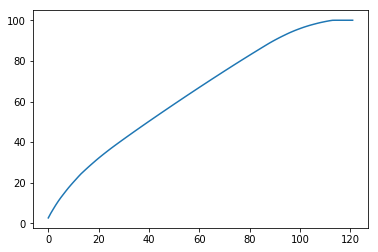

In [198]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)#Use none first to get a look at the data
X_train_sc = pca.fit_transform(X_train_sc)
X_test_sc = pca.transform(X_test_sc)
explained_variance = pca.explained_variance_ratio_
#Use this last two to visualize
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [199]:
##About 115 variables explain most of the variance in the dataset.

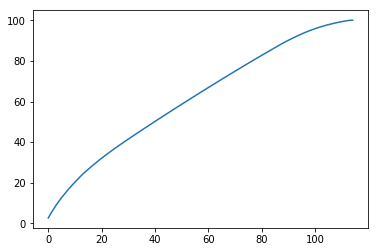

In [200]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 115)#Use none first to get a look at the data
X_train_sc = pca.fit_transform(X_train_sc)
X_test_sc = pca.transform(X_test_sc)
explained_variance = pca.explained_variance_ratio_
#Use this last two to visualize
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [680]:
X_train_sc.shape

(24104, 115)

### 3.  Building Predictive/Machine Learning Models

In [201]:
#Lets define the cross validation metrics for defining the train and test data
#Lets use 10-fold validation and default parameters as the scoring parameter
num_folds = 10
seed =7

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [206]:
#I chose three models to test for best performing
models =[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('FRST',RandomForestClassifier(n_estimators = 10, criterion = 'entropy')))

In [207]:
#Evaluate each model
results =[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=num_folds,random_state = seed)
    cv_results = cross_val_score(model,X_train_sc,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR: 0.891263 (0.005308)
KNN: 0.910969 (0.004275)
FRST: 0.906572 (0.005001)


In [208]:
help(KNeighborsClassifier())

Help on KNeighborsClassifier in module sklearn.neighbors.classification object:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t

In [ ]:
#Looks like KNN performs better that the other two. Now let me try fine-tune the parameters even more.

In [211]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [213]:
y_pred = classifier.predict(X_test_sc)#Using the parameter chosen

In [214]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [215]:
cm

array([[4743,   30],
       [ 508,  746]], dtype=int64)

In [216]:
(4743+746)/(4743+746+30+508)

0.9107350257176041

In [695]:
# KNeighbourClassifier Algorithm tuning
k_values = numpy.array([3,5,7,9,11,13])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(X_train_sc, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [687]:
#use the RandomForest Classifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier2.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [688]:
y_pred2 = classifier2.predict(X_test_sc)#Using the parameter chosen

In [689]:
cm2 = confusion_matrix(y_test, y_pred2)

In [690]:
cm2

array([[4735,   38],
       [ 543,  711]], dtype=int64)

In [691]:
(4735+711)/(4735+711+38+543)#90%accuracy

0.9036004645760743

### 4.  Make predictions on the test datasets

In [572]:
df_test = pd.read_csv('exercise_02_test.csv')

#### Exploration and Cleaning of test data

In [333]:
df_test.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,6.625366,54.479467,15.285444,-0.794648,22.498346,-29.212209,1.435134,-4.551934,5.930404,-3.319388,...,-18.919238,1.774657,2.216406,america,0.987554,34.396477,-55.883515,13.739194,2.824056,1.141799
1,3.796927,-20.244923,-18.084196,-1.113454,-3.551728,-4.025589,1.971885,-1.965186,13.210722,-4.262240,...,33.878264,-1.027421,7.924785,asia,2.615088,15.038461,-13.110477,-13.018951,-5.069025,0.568757
2,31.875080,-61.467354,14.943580,0.979055,6.796937,-29.708041,4.778812,-2.682217,-17.122526,0.903299,...,-28.553940,1.755786,-0.325669,asia,-0.986222,-1.769850,-7.140415,0.791425,-3.224037,-0.816682
3,15.266588,-18.454831,1.105534,-2.718771,-5.511702,2.252314,-8.017649,3.635776,-13.024884,-1.751722,...,14.380384,-0.756253,5.930171,asia,-2.199690,-16.389740,-2.564346,-16.716012,5.559949,0.603007
4,-17.616761,15.810515,-17.972025,-1.995724,-23.112552,-15.899861,-17.054154,4.097427,-7.755402,-2.553410,...,-22.999896,-1.364063,1.207973,asia,1.694508,-4.086831,-28.709156,23.003355,-4.358594,1.929231


In [218]:
df_test.shape

(10000, 100)

In [223]:
#df_test.isnull().sum()#Nunmber of null valuesin each column

In [ ]:
#Fill null values with mean for float types, and median for obj types

In [477]:
fill_mean = lambda col:col.fillna(col.mean())

In [611]:
fill_mode = lambda col:col.fillna(stat.mode(col))

In [ ]:
#df = df_train[~df_train.isna().any(axis = 1)]#Remove all instances of nan in the dataframe

In [573]:
float_cols = list(df_test.select_dtypes(include = ['float']).copy().columns)

In [328]:
len(float_cols)

94

In [574]:
float_types = df_test.select_dtypes(include = ['float']).copy()

In [576]:
#Fill the missing values with mean for all the float_type columns
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 1)
imputer = imputer.fit(float_types.loc[:, :])
float_types.loc[:, :] = imputer.transform(float_types.loc[:, :])

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [578]:
#float_types.isnull().sum()

In [344]:
#float_types = df_test.select_dtypes(include = ['float']).copy()

In [479]:
bg = float_types['x0'].fillna(fill_mean)

In [481]:
bg.isnull().sum()

0

In [345]:
float_types.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
0,6.62537,54.4795,15.2854,-0.794648,22.498346,-29.2122,1.43513,-4.55193,5.9304,-3.31939,...,2.48715,-18.9192,1.77466,2.21641,0.987554,34.3965,-55.8835,13.739194,2.82406,1.1418
1,3.79693,-20.2449,-18.0842,-1.11345,-3.551728,-4.02559,1.97189,-1.96519,13.2107,-4.26224,...,0.0819481,33.8783,-1.02742,7.92478,2.61509,15.0385,-13.1105,-13.018951,-5.06902,0.568757
2,31.8751,-61.4674,14.9436,0.979055,6.796937,-29.708,4.77881,-2.68222,-17.1225,0.903299,...,-1.42048,-28.5539,1.75579,-0.325669,-0.986222,-1.76985,-7.14042,0.791425,-3.22404,-0.816682
3,15.2666,-18.4548,1.10553,-2.71877,-5.511702,2.25231,-8.01765,3.63578,-13.0249,-1.75172,...,4.78696,14.3804,-0.756253,5.93017,-2.19969,-16.3897,-2.56435,-16.716012,5.55995,0.603007
4,-17.6168,15.8105,-17.972,-1.99572,-23.112552,-15.8999,-17.0542,4.09743,-7.7554,-2.55341,...,-2.24521,-22.9999,-1.36406,1.20797,1.69451,-4.08683,-28.7092,23.003355,-4.35859,1.92923


In [488]:
#float_types.isnull().sum()

In [489]:
float_types.shape

(10000, 94)

In [579]:
obj_cols = list(df_test.select_dtypes(include = ['object']).copy().columns)#Select columns with categorical datasets

In [597]:
obj_types = df_test.select_dtypes(include = ['object']).copy()#Select columns with categorical datasets

In [686]:
#stat.mode(obj_types['x68'])

In [598]:
obj_types.head()

,x34,x35,x41,x45,x68,x93
0,volkswagon,wed,$2475.46,-0.01%,Aug,america
1,bmw,thurday,$-1109.1,0.0%,Jun,asia
2,volkswagon,thurday,$-187.7,-0.0%,sept.,asia
3,Toyota,wednesday,$525.65,0.01%,July,asia
4,Toyota,thurday,$-1113.53,0.0%,Apr,asia


In [613]:
#Replace the missing values in the categorical columns with the most frequently occurring
obj_types2 = obj_types.apply(fill_mode,axis = 0)#This replaced NaN with the most frequent

In [615]:
obj_types2['x34'].value_counts()

volkswagon    3236
Toyota        2616
bmw           1844
Honda         1293
tesla          583
chrystler      281
nissan          95
ford            40
mercades        10
chevrolet        2
Name: x34, dtype: int64

In [592]:
#obj_types[obj_types.isnull()]

In [617]:
df_test1 = pd.concat([float_types,obj_types2], axis = 1)#combine the two dataframes

In [618]:
df_test1.shape

(10000, 100)

In [620]:
#df_test1.isnull().sum()

In [357]:
#df_test['x0'].mode()

In [291]:
import statistics as stat

In [272]:
df_test['x41'][1]

'-1109.1'

In [271]:
type(df_test['x41'])

pandas.core.series.Series

In [368]:
df_test['x35'].value_counts()

wednesday    5241
thursday     4402
tuesday       218
friday        126
monday         13
Name: x35, dtype: int64

In [227]:
#df_test['x41']

In [240]:
removeSign = lambda x: x[1:]#Remove first element of an element

In [ ]:
#obj_types2['x41'] = obj_types2['x41'].apply(removeSign).astype(float)#Changed to float type, and remove the sign

In [621]:
change_val = lambda x:'Dec' if x=='Dev' else x#Change the value of a given element, say Dev to December, thur to Thursday

In [629]:
change_val = lambda x:'thursday' if x=='thurday' else x#Change the value of a given element, say Dev to December, thur to Thursday

In [622]:
df_test1['x68'] = df_test1['x68'].apply(change_val)

In [630]:
df_test1['x35'] = df_test1['x35'].apply(change_val)

In [631]:
df_test1['x35'].value_counts()

wednesday    5241
thursday     4402
tuesday       218
friday        126
monday         13
Name: x35, dtype: int64

In [399]:
df_test1['x41'].dtypes

dtype('O')

In [632]:
df_test1['x41'] = df_test1['x41'].apply(removeSign)#Changed to float type, and remove the sign

In [ ]:
df['x68'] = df['x68'].apply(change_val)
#obj_types['x41'] = obj_types['x41'].apply(removLast).astype(float)

In [635]:
#df_test1['x41'] = df_test1['x41'].apply(pd.to_numeric, errors='coerce')

In [633]:
df_test1['x41'] = df_test1['x41'].astype('float')

In [634]:
df_test1['x41'].dtype

dtype('float64')

In [403]:
#function <lambda> at 0x000001F08FFD19D8>

In [413]:
df_test1['x45'][0]

'-0.01%'

In [640]:
df_test1['x45'] = df_test1['x45'].astype('float')#Changed to str type,

In [636]:
df_test1['x45'] = df_test1['x45'].apply(removeLast)# and remove the sign

In [638]:
df_test1['x45'] = df_test1['x45'].apply(pd.to_numeric, errors='coerce')# and remove the sign

In [408]:
removeLast = lambda x: x[:-1]#Remove last memeber of an element

In [641]:
df_test1['x45'].value_counts()

 0.00    3876
 0.01    2430
-0.01    2365
 0.02     602
-0.02     597
-0.03      64
 0.03      61
 0.04       3
-0.04       2
Name: x45, dtype: int64

In [642]:
df_test1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x96,x97,x98,x99,x34,x35,x41,x45,x68,x93
0,6.625366,54.479467,15.285444,-0.794648,22.498346,-29.212209,1.435134,-4.551934,5.930404,-3.319388,...,-55.883515,13.739194,2.824056,1.141799,volkswagon,wednesday,2475.46,-0.01,Aug,america
1,3.796927,-20.244923,-18.084196,-1.113454,-3.551728,-4.025589,1.971885,-1.965186,13.210722,-4.262240,...,-13.110477,-13.018951,-5.069025,0.568757,bmw,thursday,-1109.10,0.00,Jun,asia
2,31.875080,-61.467354,14.943580,0.979055,6.796937,-29.708041,4.778812,-2.682217,-17.122526,0.903299,...,-7.140415,0.791425,-3.224037,-0.816682,volkswagon,thursday,-187.70,-0.00,sept.,asia
3,15.266588,-18.454831,1.105534,-2.718771,-5.511702,2.252314,-8.017649,3.635776,-13.024884,-1.751722,...,-2.564346,-16.716012,5.559949,0.603007,Toyota,wednesday,525.65,0.01,July,asia
4,-17.616761,15.810515,-17.972025,-1.995724,-23.112552,-15.899861,-17.054154,4.097427,-7.755402,-2.553410,...,-28.709156,23.003355,-4.358594,1.929231,Toyota,thursday,-1113.53,0.00,Apr,asia


In [492]:
#float1.isnull().sum()

In [555]:
#df_test2['x34']

In [441]:
df_test2['x34'] = df_test2['x34'].astype('str')

In [442]:
df_test2['x35'] = df_test2['x35'].astype('str')

In [450]:
df_test2['x68'] = df_test2['x68'].astype('str')

In [451]:
df_test2['x93'] = df_test2['x93'].astype('str')

In [457]:
#df_test2.isnull().sum()

In [542]:
#df_float.isnull().sum()

In [522]:
#df_float = df_float.astype('float')#Change all float types back to float type

In [540]:
df_float = df_float.apply(pd.to_numeric, errors='coerce')#Change all float types back to float type

In [467]:
#df_float.dtypes

In [644]:
df_obj = df_test1.select_dtypes(include = ['object']).copy()

In [645]:
df_obj.head()

,x34,x35,x68,x93
0,volkswagon,wednesday,Aug,america
1,bmw,thursday,Jun,asia
2,volkswagon,thursday,sept.,asia
3,Toyota,wednesday,July,asia
4,Toyota,thursday,Apr,asia


Applying trained model to new dataset, predictions

In [652]:
df_test1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x96,x97,x98,x99,x34,x35,x41,x45,x68,x93
0,6.625366,54.479467,15.285444,-0.794648,22.498346,-29.212209,1.435134,-4.551934,5.930404,-3.319388,...,-55.883515,13.739194,2.824056,1.141799,volkswagon,wednesday,2475.46,-0.01,Aug,america
1,3.796927,-20.244923,-18.084196,-1.113454,-3.551728,-4.025589,1.971885,-1.965186,13.210722,-4.262240,...,-13.110477,-13.018951,-5.069025,0.568757,bmw,thursday,-1109.10,0.00,Jun,asia
2,31.875080,-61.467354,14.943580,0.979055,6.796937,-29.708041,4.778812,-2.682217,-17.122526,0.903299,...,-7.140415,0.791425,-3.224037,-0.816682,volkswagon,thursday,-187.70,-0.00,sept.,asia
3,15.266588,-18.454831,1.105534,-2.718771,-5.511702,2.252314,-8.017649,3.635776,-13.024884,-1.751722,...,-2.564346,-16.716012,5.559949,0.603007,Toyota,wednesday,525.65,0.01,July,asia
4,-17.616761,15.810515,-17.972025,-1.995724,-23.112552,-15.899861,-17.054154,4.097427,-7.755402,-2.553410,...,-28.709156,23.003355,-4.358594,1.929231,Toyota,thursday,-1113.53,0.00,Apr,asia


In [662]:
testX= df_test1.values

In [647]:
testX

array([[6.62536557765316, 54.479467490258166, 15.285444095380859, ...,
        -0.01, 'Aug', 'america'],
       [3.7969268107379706, -20.24492264059579, -18.08419627272289, ...,
        0.0, 'Jun', 'asia'],
       [31.87508003131722, -61.46735367347271, 14.943579730380733, ...,
        -0.0, 'sept.', 'asia'],
       ...,
       [30.593344977548565, 16.310726737360934, 7.145466518894635, ...,
        0.0, 'Apr', 'asia'],
       [22.669325119257987, 4.404143303525061, -41.70804043223945, ...,
        -0.0, 'Aug', 'asia'],
       [16.665982583375513, 16.531172047116005, -34.81955221334849, ...,
        -0.0, 'July', 'asia']], dtype=object)

In [651]:
#set(testX[:, 96])

In [663]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
testX[:, 94] = labelencoder_X_1.fit_transform(testX[:, 94])
labelencoder_X_2 = LabelEncoder()
testX[:, 95] = labelencoder_X_2.fit_transform(testX[:, 95])
labelencoder_X_3 = LabelEncoder()
testX[:, 98] = labelencoder_X_3.fit_transform(testX[:, 98])
labelencoder_X_4 = LabelEncoder()
testX[:, 99] = labelencoder_X_4.fit_transform(testX[:, 99])

In [655]:
set(testX[:, 94])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [656]:
set(testX[:, 95])

{0, 1, 2, 3, 4}

In [550]:
testX[:, 99]

array([1, 2, 2, ..., 2, 2, 2], dtype=object)

In [664]:
onehotencoder = OneHotEncoder(categorical_features = [94,95,98,99])
testX = onehotencoder.fit_transform(testX).toarray()#X encoded

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [666]:
testX = testX[:,4:]#Just to avoid dummy variables

In [675]:
# Feature Scaling#UtilizedStandardScaler against RubustScaler since i have removed the outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
testX_sc = sc.fit_transform(testX)
#testX_sc = sc.transform(testX)

In [674]:
testX_sc.shape

(10000, 122)

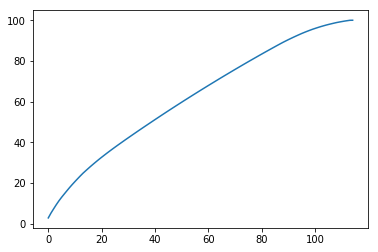

In [681]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 115)#Use none first to get a look at the data
testX_sc = pca.fit_transform(testX_sc)
#testX_sc = pca.transform(X_test_sc)
explained_variance = pca.explained_variance_ratio_
#Use this last two to visualize
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [682]:
#Use my KNeighbor classifier to make predictions
result1 = classifier.predict(testX_sc)

In [684]:
pd.DataFrame(result1).to_csv('results1.csv', index = False)#Saved the result to 'result1.csv'

In [ ]:
#Use the RandomFrorestClassifier

In [692]:
result2 = classifier2.predict(testX_sc)#Using the parameter chosen

In [693]:
pd.DataFrame(result2).to_csv('results2.csv', index = False)#Saved the result to 'result2.csv'